In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm import tqdm
from tweet import config

In [4]:
df_path = config.data / 'covid19_tweets_sentiment.csv'

In [5]:
df = pd.read_csv(df_path)
print(df.shape)
df.head()

(179113, 15)


/Users/zihaoxu/github/cs171_tweet_it_out/cs171/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment,sentiment_score
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,NEGATIVE,0.993067
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,NEGATIVE,0.987818
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,NEGATIVE,0.992243
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,POSITIVE,0.998897
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,NEGATIVE,0.992979


In [4]:
# Process sentiment score
df['sentiment_score'] = df['sentiment_score'] * np.where(df['sentiment'] == 'POSITIVE', 1, -1)

In [5]:
# Add source_clean
top_sources = df['source'].value_counts().reset_index().head(10)['index']
print(top_sources)
df['source'] = np.where(df['source'].isin(top_sources), df['source'], 'other')
df.head()

0        Twitter Web App
1    Twitter for Android
2     Twitter for iPhone
3              TweetDeck
4         Hootsuite Inc.
5       Twitter for iPad
6                 Buffer
7          Sprout Social
8              Instagram
9                  IFTTT
Name: index, dtype: object


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment,sentiment_score
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,NEGATIVE,-0.993067
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,NEGATIVE,-0.987818
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,NEGATIVE,-0.992243
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,POSITIVE,0.998897
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,NEGATIVE,-0.992979


In [6]:
df = df.dropna(subset=['date'])
df['date'] = pd.to_datetime(df['date'])
df['date_short'] = df['date'].dt.date
df['weekday'] = df['date'].dt.weekday
df['hour'] = df['date'].dt.hour
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment,sentiment_score,date_short,weekday,hour
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,NEGATIVE,-0.993067,2020-07-25,5,12
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,NEGATIVE,-0.987818,2020-07-25,5,12
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,NEGATIVE,-0.992243,2020-07-25,5,12
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,POSITIVE,0.998897,2020-07-25,5,12
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,NEGATIVE,-0.992979,2020-07-25,5,12


/Users/zihaoxu/github/cs171_tweet_it_out/cs171/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


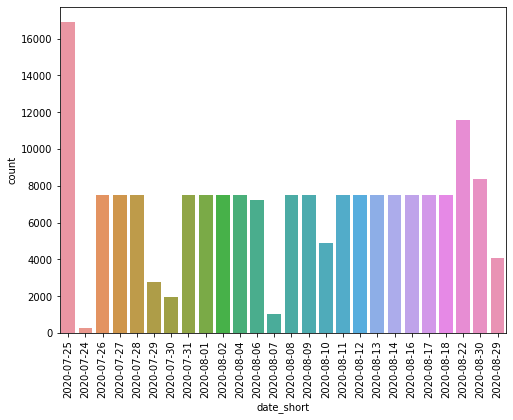

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(df['date_short'])
plt.xticks(rotation=90)
plt.show()

/Users/zihaoxu/github/cs171_tweet_it_out/cs171/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='count'>

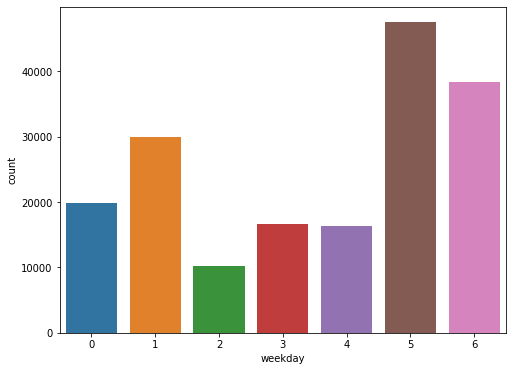

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(df['weekday'])

/Users/zihaoxu/github/cs171_tweet_it_out/cs171/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='count'>

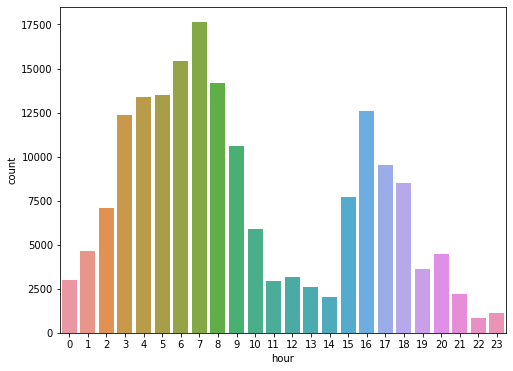

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(df['hour'])

/Users/zihaoxu/github/cs171_tweet_it_out/cs171/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

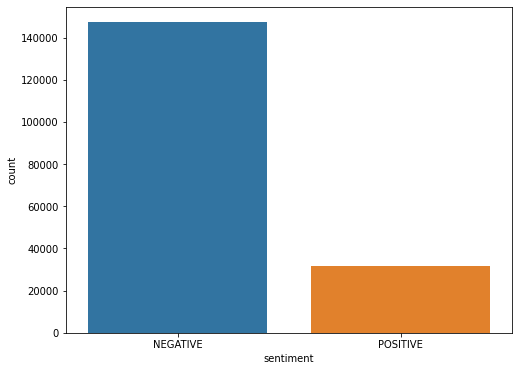

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(df['sentiment'])

/Users/zihaoxu/github/cs171_tweet_it_out/cs171/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Twitter for iPhone'),
  Text(1, 0, 'Twitter for Android'),
  Text(2, 0, 'Twitter Web App'),
  Text(3, 0, 'Buffer'),
  Text(4, 0, 'TweetDeck'),
  Text(5, 0, 'Twitter for iPad'),
  Text(6, 0, 'other'),
  Text(7, 0, 'IFTTT'),
  Text(8, 0, 'Hootsuite Inc.'),
  Text(9, 0, 'Sprout Social'),
  Text(10, 0, 'Instagram')])

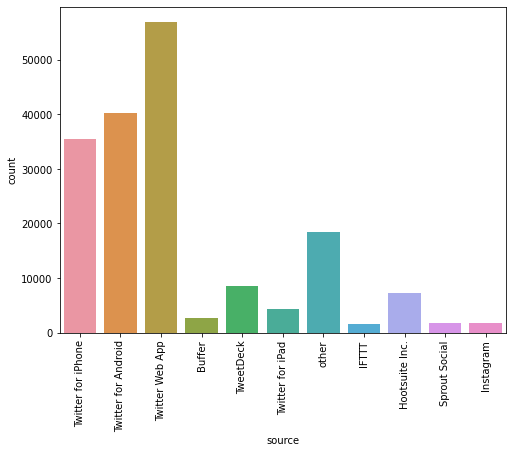

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(df['source'])
plt.xticks(rotation=90)

<Figure size 576x432 with 0 Axes>

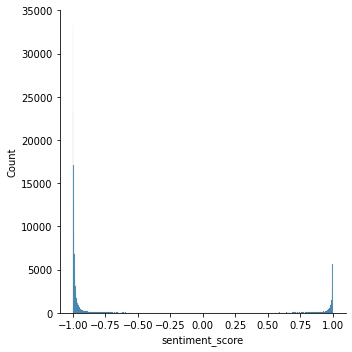

In [12]:
plt.figure(figsize=(8,6))
sns.displot(df['sentiment_score'])

/Users/zihaoxu/github/cs171_tweet_it_out/cs171/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='sentiment_score'>

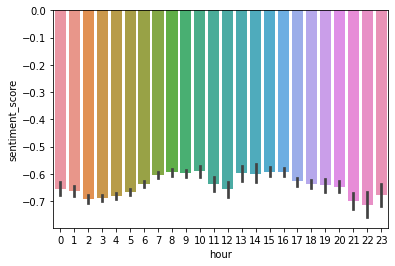

In [13]:
sns.barplot(df['hour'], df['sentiment_score'])

/Users/zihaoxu/github/cs171_tweet_it_out/cs171/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='sentiment_score'>

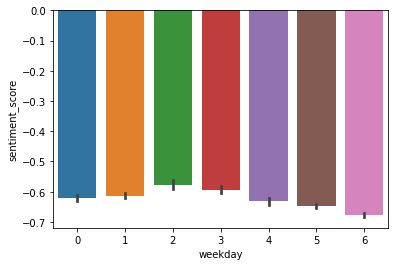

In [14]:
sns.barplot(df['weekday'], df['sentiment_score'])

/Users/zihaoxu/github/cs171_tweet_it_out/cs171/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date_short', ylabel='sentiment_score'>

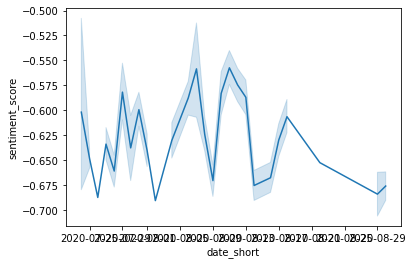

In [15]:
sns.lineplot(df['date_short'], df['sentiment_score'])

<AxesSubplot:xlabel='date_short', ylabel='sentiment_score'>

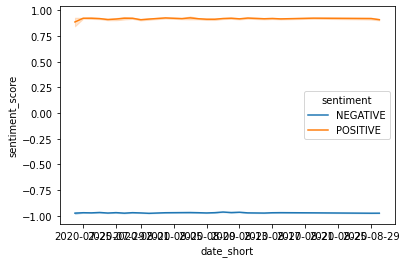

In [19]:
sns.lineplot(df['date_short'], df['sentiment_score'], hue=df['sentiment'])

/Users/zihaoxu/github/cs171_tweet_it_out/cs171/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date_short', ylabel='sentiment_score'>

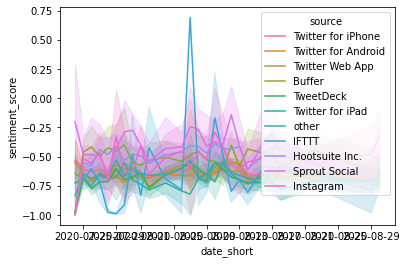

In [21]:
sns.lineplot(df['date_short'], df['sentiment_score'], hue=df['source'])

In [31]:
count = 0
for t in df['text'][-100:]:
    print(count, t, "\n\n")
    count += 1
    if count > 50:
        break

0 @WalpurgaMueller @realDonaldTrump The two atomic bombs detonated over Hiroshima and Nagasaki killed between 129,000… https://t.co/xX14gchG8y 


1 Moderna and Pfizer’s COVID-19 vaccine candidates require ultra-low temperatures, raising questions about storage, d… https://t.co/vD6EGC9d3F 


2 Superb Tony ! Hasn’t this been the summer of photos! Wonderful memories to sustain us through #COVID19 https://t.co/1ez8z4Dgh0 


3 @politvidchannel Expect when it comes to #covid19 


4 How's our recovery rate today here in SA? #COVID19 


5 #COVID19 deaths to cross 317,000 in U.S. by December 1 - You don't have to be one of them? Ask me about Immune Boos… https://t.co/OBIoGipYfY 


6 #Ecocide 
✅ We humans invaded their home and space. We must cease destroying Her for our own self-interests.… https://t.co/Q6rNTyhrjP 


7 A new UNAIDS report warns of the dangers of failing to respect human rights in the response to #COVID19. via @UNAIDS 


8 #londonprotest
Huge crowd gathered in London 's Trafalga